# Youtube channel analysis for the channel "VIT Chennai"

### using YouTube Data API v3

In [36]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns


from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

from dotenv import load_dotenv
import os


current_dir = os.getcwd()

# Specify the path to the .env file outside the folder
env_file_path = os.path.join(current_dir, '..', '.env')


# Load environment variables from .env file
load_dotenv(env_file_path)
api_key = os.getenv("API_KEY")

In [37]:
api=api_key
# channel_id="UCFJ1o0OgutcUvG3lOm70v_w" #-- VIT Bhopal Official
VIT_channels=['UCdqk7wzTloAVBY_j4p4weAg',  # Riviera - VIT University
              'UCFJ1o0OgutcUvG3lOm70v_w',  # VIT Bhopal Official
              'UC13TAqsAqIkfOUfawdJOffA',  # VIT AP
              'UCF2JKnGSPpZk60-ls4BtWRA',  # VIT Chennai
              'UCA9pirjKrKlg2bCvPKRDkyg',  # Vellore Institute of Technology
              'UCvobcKpQX1cL4PJnVllPnmg',  # VITrendZ Chennai
              'UCrRBXKMWBhAHF31J4QkPWCw',  # Placement VIT Bhopal
              'UC9JuWZdup3Lkh05KObjtptw'   # Insights Club | VIT Bhopal
             ]
api_service='youtube'
api_version='v3'

yt= build(api_service, api_version, developerKey=api)

## Setting up the platform to get channel statistics

In [38]:
def get_channel_stats(yt, VIT_channels):
    
    all_stats=[]
    request=yt.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(VIT_channels))  #list into a single string
    response=request.execute()
    
    for i in range(len(response['items'])): # iterating 8 times for all nine channels
        stats=dict(Channel_name=response['items'][i]['snippet']['title'],
                   Subscribers=response['items'][i]['statistics']['subscriberCount'],
                   Views =response['items'][i]['statistics']['viewCount'],
                   Videos=response['items'][i]['statistics']['videoCount'],
                   Id_playlist=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_stats.append(stats) # appending responses to all_stats
    return all_stats 

In [39]:
stats_channel=get_channel_stats(yt, VIT_channels)

In [40]:
# visualizing it into a table
data_channel=pd.DataFrame(stats_channel)
data_channel

,Channel_name,Subscribers,Views,Videos,Id_playlist
0,VIT AP,9320,3565787,360,UU13TAqsAqIkfOUfawdJOffA
1,Riviera - VIT University,7530,1515894,41,UUdqk7wzTloAVBY_j4p4weAg
2,VIT Chennai,9470,932846,101,UUF2JKnGSPpZk60-ls4BtWRA
3,Vellore Institute of Technology,60300,15392160,640,UUA9pirjKrKlg2bCvPKRDkyg
4,Placement VIT Bhopal,3720,50707,72,UUrRBXKMWBhAHF31J4QkPWCw
5,VIT BHOPAL Official,7390,1267160,273,UUFJ1o0OgutcUvG3lOm70v_w
6,Insights Club | VIT Bhopal,339,41366,39,UU9JuWZdup3Lkh05KObjtptw
7,VITrendZ Chennai,1640,95782,48,UUvobcKpQX1cL4PJnVllPnmg


In [41]:
#converting object data type to integers

data_channel['Subscribers']=pd.to_numeric(data_channel['Subscribers'])
data_channel['Views']=pd.to_numeric(data_channel['Views'])
data_channel['Videos']=pd.to_numeric(data_channel['Videos'])


data_channel.dtypes


Channel_name    object
Subscribers      int64
Views            int64
Videos           int64
Id_playlist     object
dtype: object

#### Bar plot using seaborn for subscribers


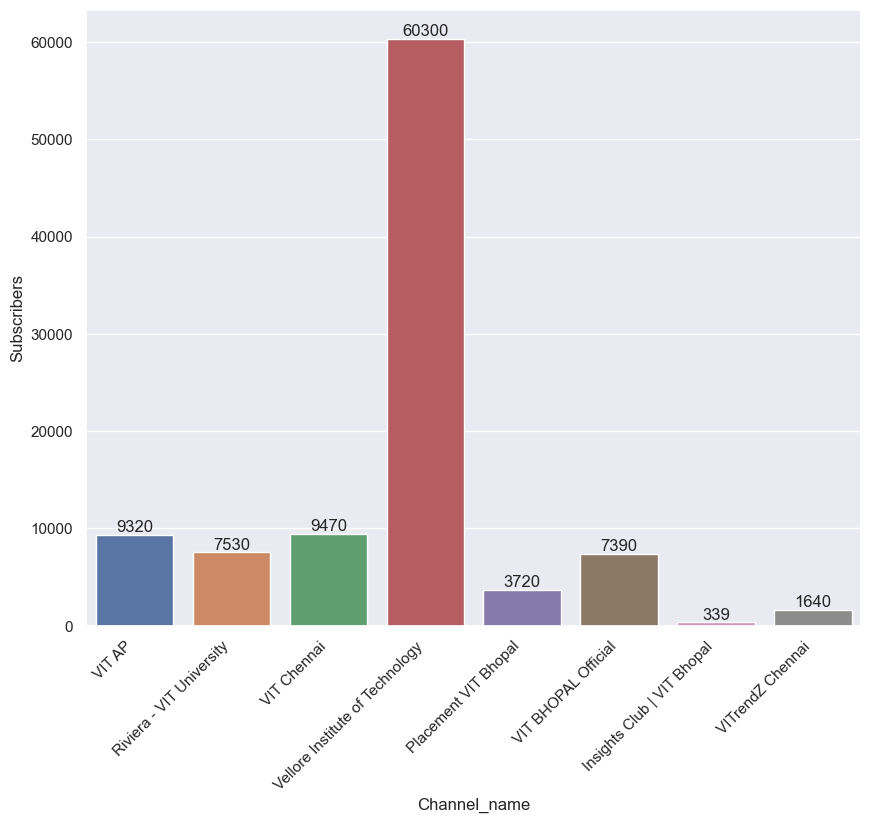

In [42]:
# bar plot using seaborn for subscribers

bar=sns.barplot(x='Channel_name', y='Subscribers', data=data_channel)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


for index, value in enumerate(data_channel['Subscribers']):
    bar.text(index, value, str(value), ha='center', va='bottom')

#### Bar plot using seaborn for Views


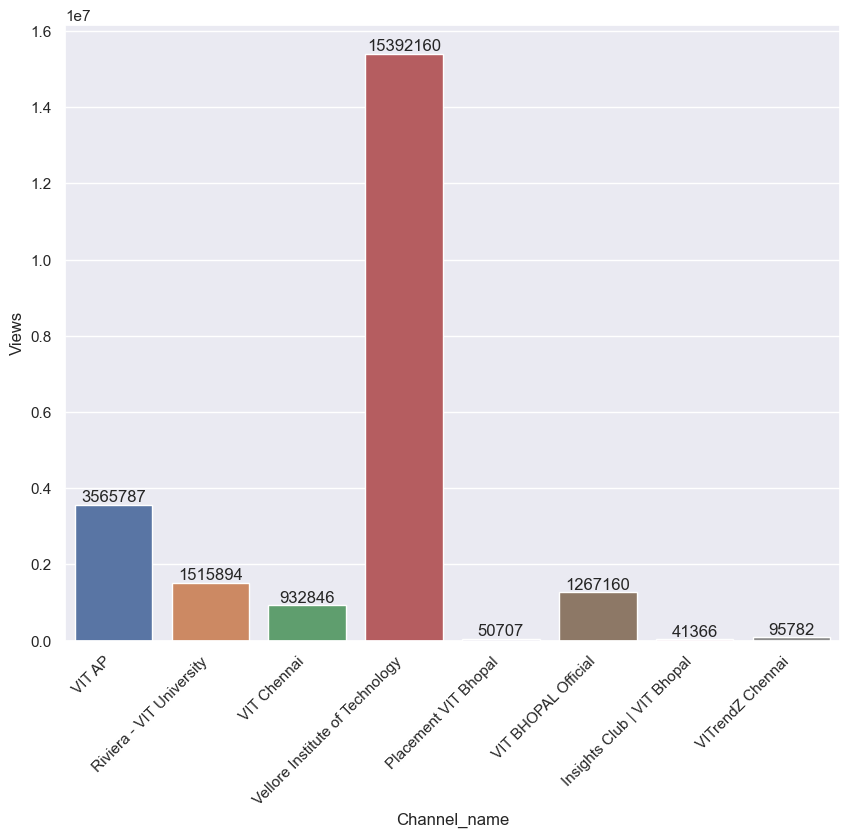

In [43]:
# bar plot using seaborn for Views


bar=sns.barplot(x='Channel_name', y='Views', data=data_channel)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


for index, value in enumerate(data_channel['Views']):
    bar.text(index, value, str(value), ha='center', va='bottom')


#### Bar plot using seaborn for number of Videos


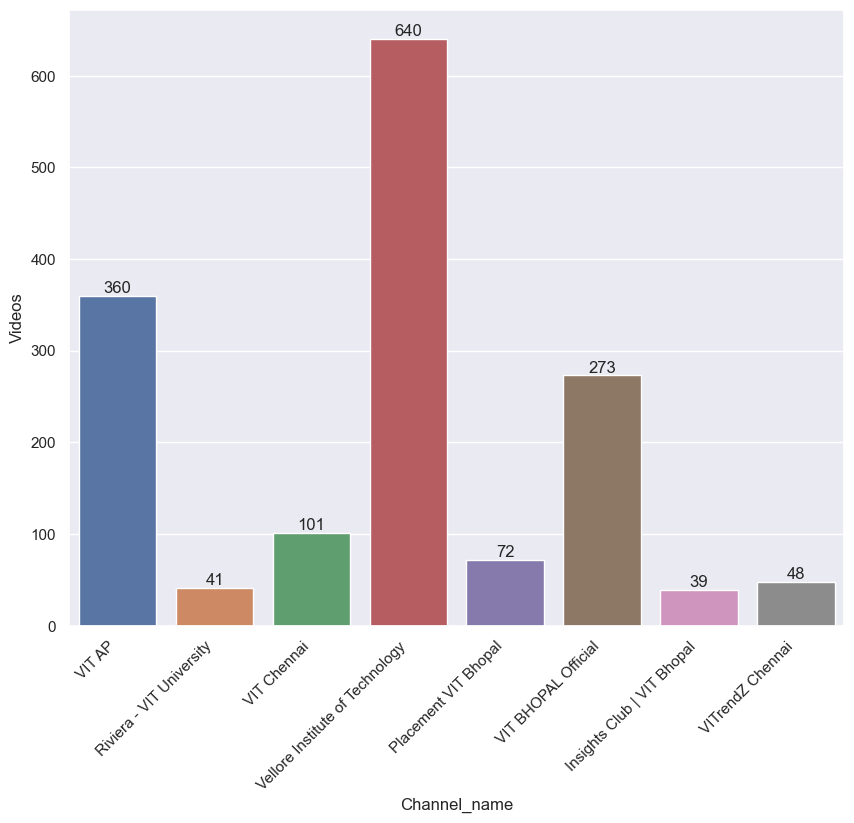

In [44]:
# bar plot using seaborn for Videos


bar=sns.barplot(x='Channel_name', y='Videos', data=data_channel)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


for index, value in enumerate(data_channel['Videos']):
    bar.text(index, value, str(value), ha='center', va='bottom')

### Let's Explore the "VIT Chennai" Channel

In [45]:
data_channel


,Channel_name,Subscribers,Views,Videos,Id_playlist
0,VIT AP,9320,3565787,360,UU13TAqsAqIkfOUfawdJOffA
1,Riviera - VIT University,7530,1515894,41,UUdqk7wzTloAVBY_j4p4weAg
2,VIT Chennai,9470,932846,101,UUF2JKnGSPpZk60-ls4BtWRA
3,Vellore Institute of Technology,60300,15392160,640,UUA9pirjKrKlg2bCvPKRDkyg
4,Placement VIT Bhopal,3720,50707,72,UUrRBXKMWBhAHF31J4QkPWCw
5,VIT BHOPAL Official,7390,1267160,273,UUFJ1o0OgutcUvG3lOm70v_w
6,Insights Club | VIT Bhopal,339,41366,39,UU9JuWZdup3Lkh05KObjtptw
7,VITrendZ Chennai,1640,95782,48,UUvobcKpQX1cL4PJnVllPnmg


In [46]:
Id_playlist = data_channel.loc[data_channel['Channel_name'] == "VIT Chennai", 'Id_playlist'].iloc[0]
# assigning playlist id value of "VIT Chennai" to Id_playlist variable

In [47]:
# get ids for the channel

def get_videos_id(yt, Id_playlist):
    request=yt.playlistItems().list(
                part="contentDetails",
                playlistId=Id_playlist,
                maxResults=50)
    response=request.execute()
    
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token=response.get('nextPageToken')
    more_pages=True
    
    # as we have limitation for 50 we will use while loop to get all videos untill we are not left with any videos
    
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request=yt.playlistItems().list(
                            part='contentDetails',
                            playlistId=Id_playlist,
                            maxResults=50,
                            pageToken = next_page_token)
            response=request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
                
            next_page_token=response.get('nextPageToken')
    
    
    
    
    
    
    return video_ids
    


In [48]:
video_ids=get_videos_id(yt, Id_playlist)

### Now let's Find out details about "VIT Chennai" Channel

In [49]:
def get_video_details(yt, video_ids):
    all_video_stats=[]
    # we will iterate the requests to get the data of all videos, as it is limited to 50 videos each time
    
    for i in range(0, len(video_ids), 50):
        request =yt.videos().list(
                part='snippet, statistics', 
                id=','.join(video_ids[i:i+50]))# each iteration it will take 50 data
        response=request.execute()
        
        for video in response['items']:
            video_stats=dict(Title=video['snippet']['title'],
                            Date_upload=video['snippet']['publishedAt'],
                            Views=video['statistics']['viewCount'],
                            Likes=video['statistics']['likeCount'] 
                            )# this channel disabled comments on their videos
            all_video_stats.append(video_stats)
    return all_video_stats

In [50]:
details_video=get_video_details(yt, video_ids)

In [51]:
# visualizing it into a table

data_video=pd.DataFrame(details_video)

In [52]:
data_video['Date_upload']=pd.to_datetime(data_video['Date_upload']).dt.date
data_video['Views']=pd.to_numeric(data_video['Views'])
data_video['Likes']=pd.to_numeric(data_video['Likes'])
data_video

,Title,Date_upload,Views,Likes
0,🎉 Happy New Year 2024 to all🎊 #happynewyear #n...,2023-12-31,233,7
1,😎VIT Chennai Student's Agricultural Invention🌾...,2023-11-03,62369,48
2,✨VIT is my Best Decision🎓,2023-11-02,3651,64
3,🌟VIT Chennai Behindwoods Coverage🚀,2023-10-25,9648,188
4,✨Vibrance After-Movie 2023 🔥 | VIT Chennai Vib...,2023-10-18,8893,397
...,...,...,...,...
95,Ms Kadhambari S Viswanathan Speech | Assistant...,2017-03-28,1903,21
96,"Dr G Viswanathan, VIT Founder & Chancellor Ful...",2017-03-28,605,4
97,Hip Hop Tamizha Adhi Speech | Tamil Pongal Day...,2017-03-21,50308,1609
98,24th Governor of Puducherry Dr Kiran Bedi Full...,2017-03-20,743,8


###### Q let's find top 10 videos

In [53]:
# lets find top 10 videos
top_videos=data_video.sort_values(by='Views', ascending=False).head(10)

top_videos

,Title,Date_upload,Views,Likes
15,"VITSOL, VIT Chennai",2023-04-03,242973,8957
85,Official Teaser of VIBRANCE 2020 | VIT Chennai...,2020-01-30,90175,96
86,VIBRANCE 2020 | National Level Cultural & Spor...,2020-01-30,85896,41
1,😎VIT Chennai Student's Agricultural Invention🌾...,2023-11-03,62369,48
97,Hip Hop Tamizha Adhi Speech | Tamil Pongal Day...,2017-03-21,50308,1609
87,VIT Chennai - Top Private Institution for Inno...,2020-01-22,42581,506
24,Annual Convocation 2022 - VIT Chennai,2022-08-27,28951,423
83,Advanced BBA (Hons) Program | VIT Chennai Campus,2020-03-11,27675,21
5,Dr. Kanchana Bhaaskaran VIT Chennai Pro Vice C...,2023-10-06,24596,28
82,BBA (2+2) twinning program | VIT Chennai Campus,2020-03-16,14701,13


C:\Users\AMAR2\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128526 (\N{SMILING FACE WITH SUNGLASSES}) missing from current font.
  func(*args, **kwargs)
C:\Users\AMAR2\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  func(*args, **kwargs)
C:\Users\AMAR2\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  func(*args, **kwargs)
C:\Users\AMAR2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128526 (\N{SMILING FACE WITH SUNGLASSES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AMAR2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AMAR2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024

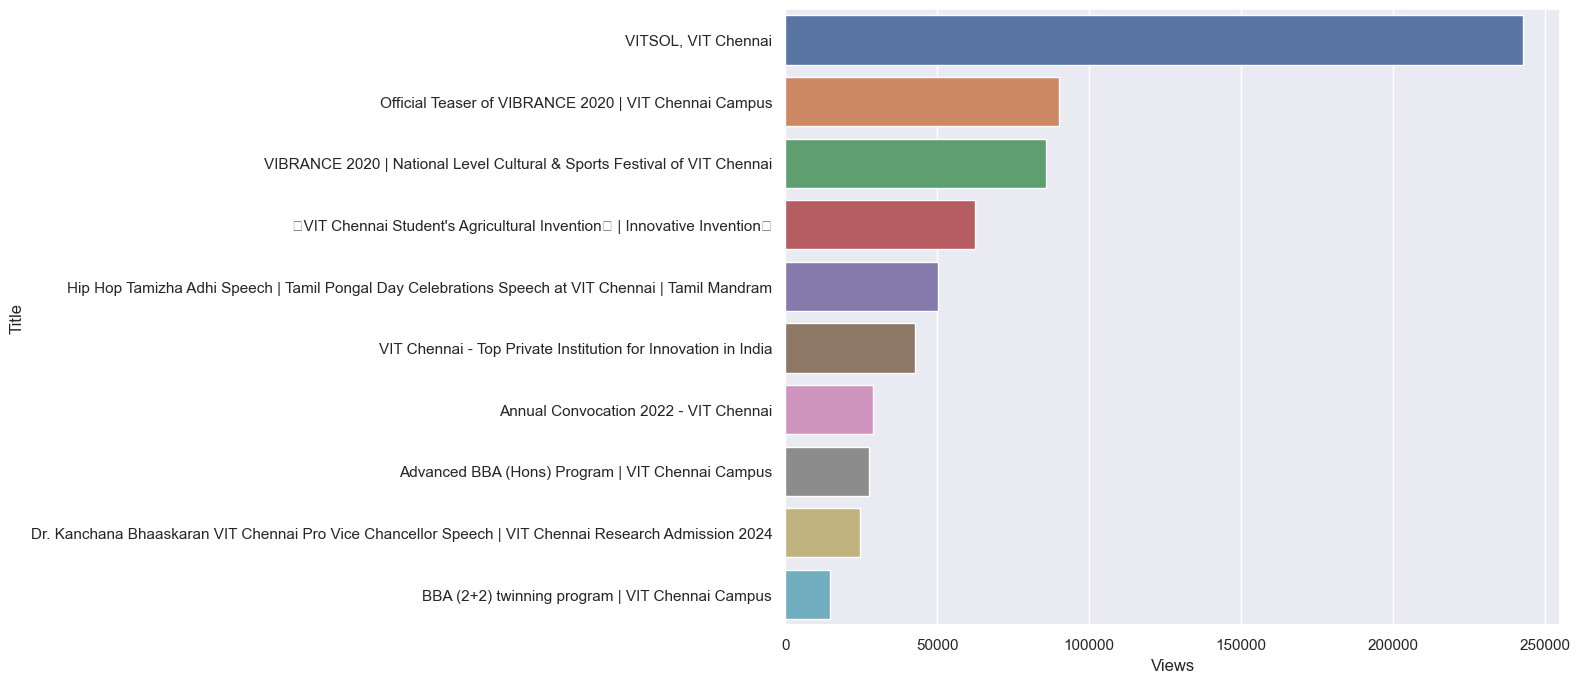

In [54]:
# bar plot for these top 10 watched videos

sns.set(rc={'figure.figsize': (10, 8)})

bar=sns.barplot(x='Views', y='Title', data=top_videos)



###### Q monthly statistics of video uploaded by "VIT Chennai"

In [55]:
# monthly statistics of video uploaded by "Vellore Institute of Technology"

data_video['Month']=pd.to_datetime(data_video['Date_upload']).dt.strftime('%b')

data_video

,Title,Date_upload,Views,Likes,Month
0,🎉 Happy New Year 2024 to all🎊 #happynewyear #n...,2023-12-31,233,7,Dec
1,😎VIT Chennai Student's Agricultural Invention🌾...,2023-11-03,62369,48,Nov
2,✨VIT is my Best Decision🎓,2023-11-02,3651,64,Nov
3,🌟VIT Chennai Behindwoods Coverage🚀,2023-10-25,9648,188,Oct
4,✨Vibrance After-Movie 2023 🔥 | VIT Chennai Vib...,2023-10-18,8893,397,Oct
...,...,...,...,...,...
95,Ms Kadhambari S Viswanathan Speech | Assistant...,2017-03-28,1903,21,Mar
96,"Dr G Viswanathan, VIT Founder & Chancellor Ful...",2017-03-28,605,4,Mar
97,Hip Hop Tamizha Adhi Speech | Tamil Pongal Day...,2017-03-21,50308,1609,Mar
98,24th Governor of Puducherry Dr Kiran Bedi Full...,2017-03-20,743,8,Mar


In [56]:
videos_per_month=data_video.groupby('Month', as_index=False).size()

videos_per_month

,Month,size
0,Apr,4
1,Aug,9
2,Dec,13
3,Feb,7
4,Jan,16
5,Jul,1
6,Jun,14
7,Mar,15
8,May,1
9,Nov,5


In [57]:
# now let's sort this months in ascending order in context to seriol no given

months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'], categories=months, ordered=True)


videos_per_month=videos_per_month.sort_index()

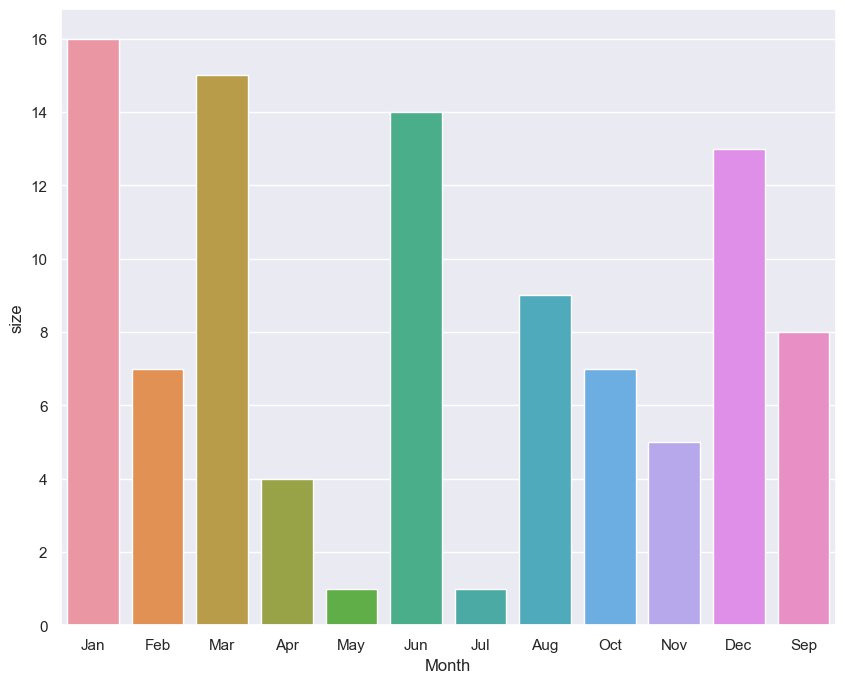

In [58]:
# videos posted each month 
sns.set(rc={'figure.figsize': (10, 8)})

bar= sns.barplot(x='Month', y='size', data=videos_per_month)

###### Q What is the average number of likes per video?

In [59]:
average_likes_per_video = data_video['Likes'].mean()
average_likes_per_video

159.23

###### Q What is the correlation between views and likes?


In [60]:
correlation_views_likes = data_video['Views'].corr(data_video['Likes'])
correlation_views_likes

0.8670427054485077

###### Q Which video has the highest number of views?


In [61]:
video_with_highest_views = data_video.loc[data_video['Views'].idxmax()]['Title']
video_with_highest_views

'VITSOL, VIT Chennai'

###### Q How many videos have views greater than 1 lakh?


In [62]:
videos_above_threshold = data_video[data_video['Views'] > 100000]
videos_above_threshold

,Title,Date_upload,Views,Likes,Month
15,"VITSOL, VIT Chennai",2023-04-03,242973,8957,Apr


###### Q What is the average number of views for videos with more than 100 likes?


In [63]:
average_views_for_high_likes = data_video[data_video['Likes'] > 100]['Views'].mean()
average_views_for_high_likes

30758.2

###### Q What is the trend in views over time (plot)?


<Axes: title={'center': 'Views Over Time'}, xlabel='Date_upload'>

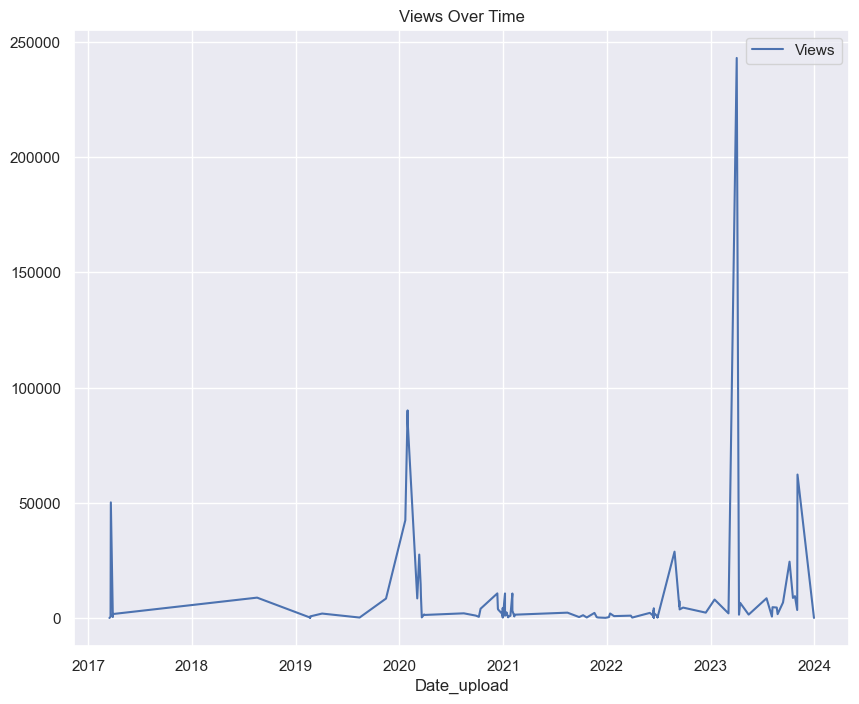

In [64]:
# What is the trend in views over time (plot)?
data_video.plot(x='Date_upload', y='Views', kind='line', title='Views Over Time')

###### Q What is the trend in likes over time (plot)?


<Axes: title={'center': 'Likes Over Time'}, xlabel='Date_upload'>

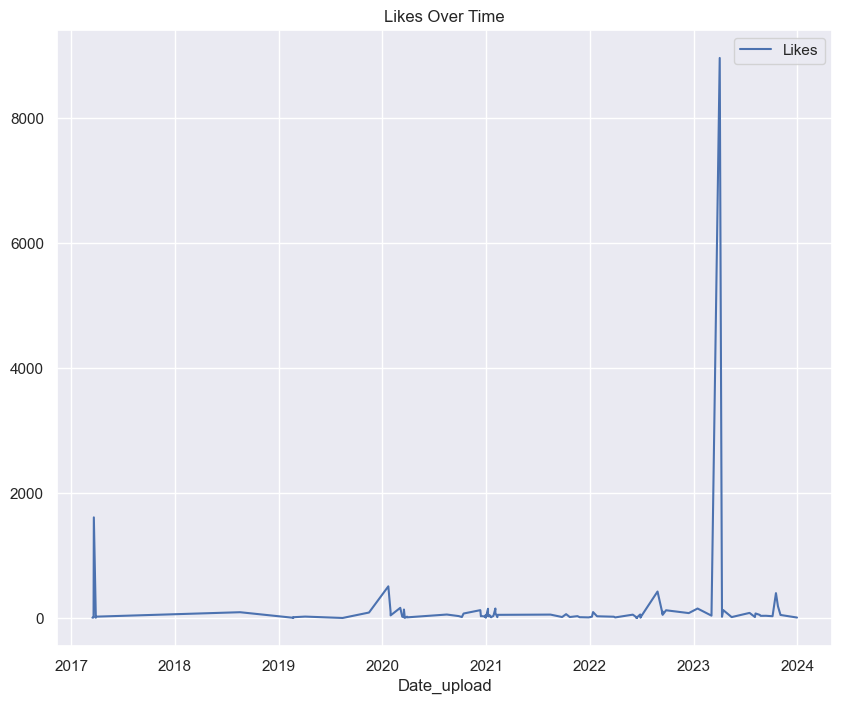

In [65]:
# What is the trend in likes over time (plot)?
data_video.plot(x='Date_upload', y='Likes', kind='line', title='Likes Over Time')

###### Q How many videos have zero likes?


In [66]:
videos_with_zero_likes = data_video[data_video['Likes'] == 0]
videos_with_zero_likes

,Title,Date_upload,Views,Likes,Month
31,B.Sc.,2022-06-15,4270,0,Jun
34,LL.M,2022-06-15,1931,0,Jun
37,B.Sc. Programme,2022-06-15,3524,0,Jun
89,VIT Chennai Live Stream - Facilio_Preplacement...,2019-08-14,382,0,Aug
92,VIT Chennai Live Stream,2019-02-21,332,0,Feb


### Download the video data for this channel in .CSV form


In [67]:
# download the video data for this channel

data_video.to_csv('YT_Data_VIT Chennai.csv')

##### Made with ❤️ by Amar Kumar